          0         1
0  1.863411  0.087646
1 -1.530997  1.901182
2 -0.017224 -2.591112
3 -2.032039 -1.801162
4  4.620555  0.901124
   0
0  1
1  0
2  0
3  0
4  1


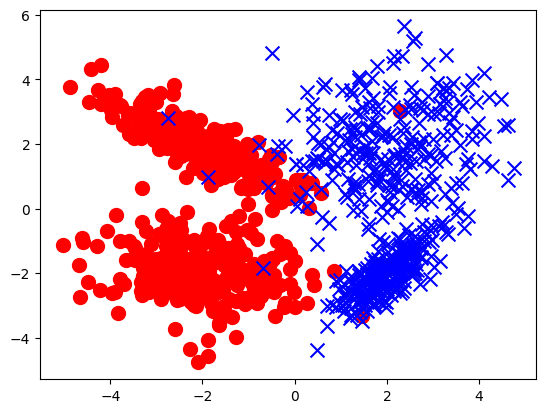

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score

# генерация данных
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

print(pd.DataFrame(X).head())
print(pd.DataFrame(y).head())

plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


In [ ]:
# градиентный спуск
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

# логистическая регрессия
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [ ]:
# столбец единиц
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.98 F1-score = 0.98


[ 1.         -6.03367039 -5.76154392]


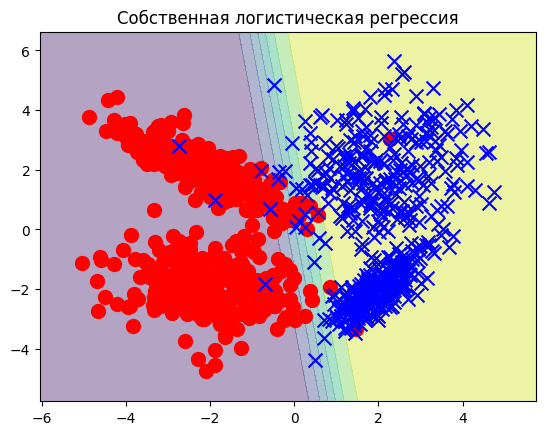

In [ ]:
# визуализация разделяющей поверхности
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])
print(XX[0])
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.title('Собственная логистическая регрессия')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'sklearn: accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

# Подсчёт правильных и неправильных предсказаний
correct = np.sum(y_pred_lr == y)
incorrect = np.sum(y_pred_lr != y)
total = len(y)

print(f'\nДетальный анализ:')
print(f'Всего предсказаний: {total}')
print(f'Правильных: {correct} ({100*correct/total:.1f}%)')
print(f'Ошибок: {incorrect} ({100*incorrect/total:.1f}%)')
print(f'\nМатрица ошибок (Confusion Matrix):')
print(confusion_matrix(y, y_pred_lr))
print(f'\nОтчет классификации:')
print(classification_report(y, y_pred_lr))


sklearn: accuracy = 0.98 F1-score = 0.98


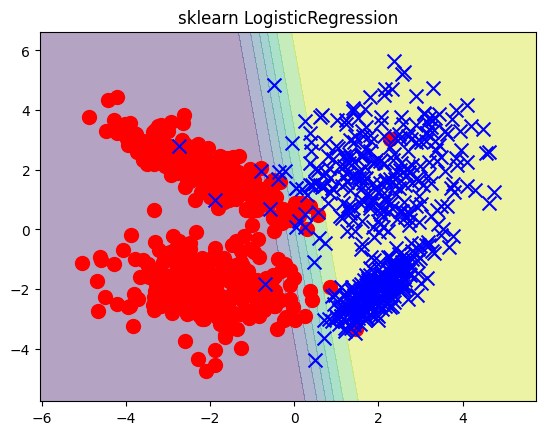

In [ ]:
Z_lr = model.predict_proba(XX)[:, 1]
Z_lr = Z_lr.reshape(xx.shape)
plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)
plt.title('sklearn LogisticRegression')
plt.show()


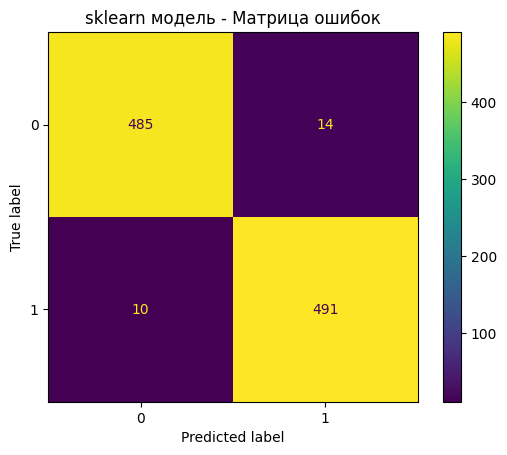

sklearn модель: accuracy = 0.98, F1-score = 0.98


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_sklearn = confusion_matrix(y, y_pred_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_sklearn).plot()
plt.title('sklearn модель')
plt.show()

print(f'sklearn модель: accuracy = {ac_lr:.2f}, F1-score = {f1_lr:.2f}')
